In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Einlesen des Datensatzes 
data = pd.read_csv("GW_data.csv",delimiter=",")

Um sich einen ersten Überblick über die bivariaten Beziehungen in dem gesamten Datensatz zu verschaffen, kann man einen Pairplot erstellen. 
Aufgrund der größe des Datensatzes ist das aber eher ungeeignet, da es sehr unübersichtlich und sehr viele Beziehungen gibt. 

In [3]:
#Pairplot erstellen
sns.pairplot(data)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fbc9fae1b00> (for post_execute):


KeyboardInterrupt: 

Um die Beziehungen der Daten genauer zu klassifizieren, werden die Korrelationskoeffizienten betrachtet. 
Zuerst werden die 1)Kovarianzen berechnet und anschließend die 2) Korrelationsmatrix

In [ ]:
#Berechnung der Kovarianzen
cov_matrix = data.cov()
print(cov_matrix)

In [ ]:
#Berechnung der Korrelationsmatrix
corr_matrix = data.corr()
print(corr_matrix)

In [ ]:
#Zur Visualisierung der Korrelationsmatrix wird eine heatmap erstellt
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

Um zwei Parameterpaare und ihre Beziehungen zu klassifzieren, bietet es sich an ein Jointplot zu erstellen.

In [ ]:
#Erstellen eines Jointsplots 
sns.jointplot(data['O2 [mg/l]'], data['T [°C]'])
plt.show()

Im nächsten Schritt werden die p-Werte der Koeffizienten des ausgewählten Parameterpaares, Sauerstoffgehalt und Grundwassertemperatur, berechnet

In [ ]:
#NaN Werte müssen herausgenommen werden, um Zahlenpaare zur Berechnung zu erhalten 
dataTO2= data.loc[:,['O2 [mg/l]','T [°C]']]
data_clean = dataTO2.dropna()
#Berechnung des Korrelationskoeffizent und p-Wert nach Pearson 
r, p = stats.pearsonr(data_clean['O2 [mg/l]'],data_clean['T [°C]'])
print (r, p)

In [51]:
#Berechnung des r und p-Werts nach Spearman 
r, p = stats.spearmanr(data_clean['O2 [mg/l]'],data_clean['T [°C]'])
print (r, p)

-0.14495701784859602 4.93397753712055e-13


Aufgrund der niedrigen Korrelation des ersten Parameterpaares habe ich ein zweites ausgewählt. 
Natrium und Chlorid, die einen höhere Korrelationskoeffizient aufweisen

/Users/markvollmer/opt/anaconda3/envs/geo/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


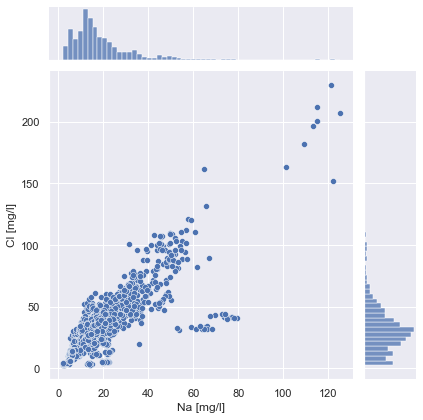

In [53]:
sns.jointplot(data['Na [mg/l]'], data['Cl [mg/l]'])
plt.show()

In [7]:
#Auswählen neuer Daten und Berechnung nach Pearson
dataNaCl= data.loc[:,['Na [mg/l]','Cl [mg/l]']]
data_clean = dataNaCl.dropna()
r, p = stats.pearsonr(data_clean['Na [mg/l]'],data_clean['Cl [mg/l]'])
print (r, p)
data_clean

0.8239390116860813 0.0


,Na [mg/l],Cl [mg/l]
2,18.5,35.1
4,20.8,42.7
6,22.0,42.1
7,21.1,39.3
9,24.2,43.0
...,...,...
3156,44.8,53.1
3161,6.1,14.6
3165,6.0,14.1
3170,6.1,13.7


In [8]:
r, p = stats.spearmanr(data_clean['Na [mg/l]'],data_clean['Cl [mg/l]'])
print (r, p)

0.815238350309998 0.0


Auswahl eines dritten Paares: SO4 und Ca 

/Users/markvollmer/opt/anaconda3/envs/geo/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


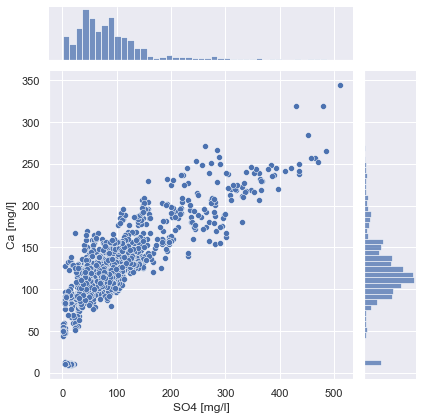

In [62]:
sns.jointplot(data['SO4 [mg/l]'], data['Ca [mg/l]'])
plt.show()

In [67]:
dataCa= data.loc[:,['SO4 [mg/l]','Ca [mg/l]']]
data_clean = dataCa.dropna()
r, p = stats.pearsonr(data_clean['SO4 [mg/l]'],data_clean['Ca [mg/l]'])
print (r, p)

0.8227270882359667 0.0


In [68]:
r, p = stats.spearmanr(data_clean['SO4 [mg/l]'],data_clean['Ca [mg/l]'])
print (r, p)

0.7763514119618646 1.4488195861075586e-297
